# Rod Cutting Problem

In [1]:
import numpy as np
cut_prices = [0, 1, 5, 8, 9, 10, 17, 17, 20, 24, 30]

## First Approach: Brute Force
### Pseudocode

**Algorithm** pure_brute_force_cutter(length, cut_prices)

    // Given the length we want to solve for, and an array of prices for each cut length
    
    if length <=0:
        return 0
    value <- -infinity
    for length_of_cut <- 1 to length:
        if length_of_cut <= 10:
            value = max(value, cut_prices[length_of_cut] + pure_brute_force_cutter(length-length_of_cut))
    return value

### Mathematical Analysis
recurrence relation is still:

$ T(n) = 1+ \sum_{i=0}^{n-1}T(i)$

by substitution:

$ T(1) = 1+ T(0)$

$ T(2) = 1+ T(0) + T(1) = 2+ 2T(0)$

$ T(3) = 1+ T(0) + T(1) + T(2) = 4+ 4T(0)$

$ T(4) = 1+ T(0) + T(1) + T(2) + T(3) = 8+ 8T(0)$

it follows that:

$ T(n) = 2^{n-1} + 2^{n-1}T(0)$

thus $T(n)$ $\epsilon$  $O(2^{n})$

### Python Implementation

In [2]:
def pure_brute_force_cutter(length, cut_prices = cut_prices, carry_over_tens = 0):
    if length <=0:
        return 0
    value = -np.inf
    for length_of_cut in range(1,length+1):
        if length_of_cut <= 10:
            value = max(value, cut_prices[length_of_cut] + pure_brute_force_cutter(length-length_of_cut))
    return value

In [3]:
import time
before = time.time()
for i in range(5, 31):
    print(f'Maximum revenue from a rod of length {i} is {pure_brute_force_cutter(i)}')
after = time.time()
print(f'\nThis took {after-before} seconds')

Maximum revenue from a rod of length 5 is 13
Maximum revenue from a rod of length 6 is 17
Maximum revenue from a rod of length 7 is 18
Maximum revenue from a rod of length 8 is 22
Maximum revenue from a rod of length 9 is 25
Maximum revenue from a rod of length 10 is 30
Maximum revenue from a rod of length 11 is 31
Maximum revenue from a rod of length 12 is 35
Maximum revenue from a rod of length 13 is 38
Maximum revenue from a rod of length 14 is 40
Maximum revenue from a rod of length 15 is 43
Maximum revenue from a rod of length 16 is 47
Maximum revenue from a rod of length 17 is 48
Maximum revenue from a rod of length 18 is 52
Maximum revenue from a rod of length 19 is 55
Maximum revenue from a rod of length 20 is 60
Maximum revenue from a rod of length 21 is 61
Maximum revenue from a rod of length 22 is 65
Maximum revenue from a rod of length 23 is 68
Maximum revenue from a rod of length 24 is 70
Maximum revenue from a rod of length 25 is 73
Maximum revenue from a rod of length 26

### Using a trick to enhance performance
Looking at the cut_price list, we can see that for a length of 10, we can't get a value higher than 30. so we can start exluding 10s from the input length until we are left with a value < 10, then we can solve that with brute force

In [4]:
def brute_force_cutter_with_a_trick(length, cut_prices = cut_prices, carry_over_tens = 0):
    if length <=0:
        return 0
    elif length> 10:
        carry_over_tens = length//10
        value = brute_force_cutter_with_a_trick(length-10*carry_over_tens, carry_over_tens = carry_over_tens)+  carry_over_tens*30
        return value
    chosen_cuts = []
    value = -np.inf
    for length_of_cut in range(1,length+1):
        if length_of_cut <= 10:
            value = max(value, cut_prices[length_of_cut] + brute_force_cutter_with_a_trick(length-length_of_cut))
    return value

In [12]:
before = time.time()
for i in range(5, 51):
    print(f'Maximum revenue from a rod of length {i} is {brute_force_cutter_with_a_trick(i)}')
after = time.time()
print(f'\nThis took {after-before} seconds')

Maximum revenue from a rod of length 5 is 13
Maximum revenue from a rod of length 6 is 17
Maximum revenue from a rod of length 7 is 18
Maximum revenue from a rod of length 8 is 22
Maximum revenue from a rod of length 9 is 25
Maximum revenue from a rod of length 10 is 30
Maximum revenue from a rod of length 11 is 31
Maximum revenue from a rod of length 12 is 35
Maximum revenue from a rod of length 13 is 38
Maximum revenue from a rod of length 14 is 40
Maximum revenue from a rod of length 15 is 43
Maximum revenue from a rod of length 16 is 47
Maximum revenue from a rod of length 17 is 48
Maximum revenue from a rod of length 18 is 52
Maximum revenue from a rod of length 19 is 55
Maximum revenue from a rod of length 20 is 60
Maximum revenue from a rod of length 21 is 61
Maximum revenue from a rod of length 22 is 65
Maximum revenue from a rod of length 23 is 68
Maximum revenue from a rod of length 24 is 70
Maximum revenue from a rod of length 25 is 73
Maximum revenue from a rod of length 26

## Second Approach: Dynamic Programming - Bottom Up
### Pseudocode

**Algorithm** bottom_up_cutter(length, cut_prices)

    tabulated_lengths[0 .. length] = - infinity
    for i = 1 to length:
        value = - indinity
        for j = 1 to i:
            if j <=10:
                value = max(value,cut_prices[j]+ tabulated_lengths[i-j])
    return tabulated_lengths[length]

### Mathematical Analysis
$\sum_{i=1}^{n}[\sum_{j=1}^{i}(c)]$

$=c\sum_{i=0}^{n}i$

$=c*\frac{n(n+1)}{2}$

$=c*\frac{n(n+1)}{2}$

$\epsilon$  $O(n^{2})$

### Python Implementation
We will use python decorators to achieve memoization, a common technique in python

In [6]:
def bottom_up_cutter(length, cut_prices = cut_prices):
    tabulated_lengths = {0:0}
    for i in range(1,length+1):
        value = -np.inf
        for j in range(1,i+1):
            if j <=10:
                value = max(value,cut_prices[j]+ tabulated_lengths[i-j])
        tabulated_lengths[i] = value
    return tabulated_lengths[length]

In [13]:
before = time.time()
for i in range(5, 51):
    print(f'Maximum revenue from a rod of length {i} is {bottom_up_cutter(i)}')
after = time.time()
print(f'\nThis took {after-before} seconds')

Maximum revenue from a rod of length 5 is 13
Maximum revenue from a rod of length 6 is 17
Maximum revenue from a rod of length 7 is 18
Maximum revenue from a rod of length 8 is 22
Maximum revenue from a rod of length 9 is 25
Maximum revenue from a rod of length 10 is 30
Maximum revenue from a rod of length 11 is 31
Maximum revenue from a rod of length 12 is 35
Maximum revenue from a rod of length 13 is 38
Maximum revenue from a rod of length 14 is 40
Maximum revenue from a rod of length 15 is 43
Maximum revenue from a rod of length 16 is 47
Maximum revenue from a rod of length 17 is 48
Maximum revenue from a rod of length 18 is 52
Maximum revenue from a rod of length 19 is 55
Maximum revenue from a rod of length 20 is 60
Maximum revenue from a rod of length 21 is 61
Maximum revenue from a rod of length 22 is 65
Maximum revenue from a rod of length 23 is 68
Maximum revenue from a rod of length 24 is 70
Maximum revenue from a rod of length 25 is 73
Maximum revenue from a rod of length 26

## Third Approach: Dynamic Programming with Memoization
### Pseudocode

**Algorithm** memoize(length, cut_prices)

    memory[0 ..length] = -infinity
    return memoized_cutter(length, cut_prices)
    
**Algorithm** memoized_cutter(length, cut_prices)

    if memory[length] >= 0:
        return memory[length]
    else if length <= 0:
        return 0
    else:
    value = -infinity
    for length_of_cut = 1 to length:
        value = max(value, cut_prices[length_of_cut] + memoized_cutter(length-length_of_cut))
    memory[length] = value
    return value

### Mathematical Analysis
recurrence relation is still:

$ T(n) = 1+ \sum_{i=0}^{n-1}T(i)$

However we massively reduced the number of calculations required

### Python Implementation
We will use python decorators to achieve memoization, a common technique in python

In [8]:
def memoize(func):
    memory = {}
    def wrapper(x):
        if x not in memory:
            memory[x] = func(x)
        return memory[x]
    return wrapper

@memoize
def memoized_cutter(length, cut_prices = cut_prices):
    if length <=0:
        return 0
    value = -np.inf
    if length <= 10:
        for length_of_cut in range(1,length+1):
            if length_of_cut <= 10:
                value = max(value, cut_prices[length_of_cut] + memoized_cutter(length-length_of_cut))
        return value
    else:
        return memoized_cutter(length-10) + 30

In [14]:
before = time.time()
for i in range(5, 51):
    print(f'Maximum revenue from a rod of length {i} is {memoized_cutter(i)}')
after = time.time()
print(f'\nThis took {after-before} seconds')

Maximum revenue from a rod of length 5 is 13
Maximum revenue from a rod of length 6 is 17
Maximum revenue from a rod of length 7 is 18
Maximum revenue from a rod of length 8 is 22
Maximum revenue from a rod of length 9 is 25
Maximum revenue from a rod of length 10 is 30
Maximum revenue from a rod of length 11 is 31
Maximum revenue from a rod of length 12 is 35
Maximum revenue from a rod of length 13 is 38
Maximum revenue from a rod of length 14 is 40
Maximum revenue from a rod of length 15 is 43
Maximum revenue from a rod of length 16 is 47
Maximum revenue from a rod of length 17 is 48
Maximum revenue from a rod of length 18 is 52
Maximum revenue from a rod of length 19 is 55
Maximum revenue from a rod of length 20 is 60
Maximum revenue from a rod of length 21 is 61
Maximum revenue from a rod of length 22 is 65
Maximum revenue from a rod of length 23 is 68
Maximum revenue from a rod of length 24 is 70
Maximum revenue from a rod of length 25 is 73
Maximum revenue from a rod of length 26

# Empirical analysis
We will run each of the four algorithms on rods of length 5 through 50 inches. we will run each length 10 times and take the average running time to plot the order of growth function. Ecept for the pure_brute_force_cutter, we will run it only up to length of 25 because it takes so long to run and the curve will dwarf the other curves anyway.

In [15]:
X = list(range(5,51))

In [16]:
import timeit, functools

times_for_pure_brute_force_cutter = []
for i in X[0:21]:
    t = timeit.Timer(functools.partial(pure_brute_force_cutter, i))
    elapsed_time = t.timeit(10)/10
    times_for_pure_brute_force_cutter.append(elapsed_time)

In [17]:
times_for_brute_force_cutter_with_a_trick = []
for i in X:
    t = timeit.Timer(functools.partial(brute_force_cutter_with_a_trick, i))
    elapsed_time = t.timeit(10)/10
    times_for_brute_force_cutter_with_a_trick.append(elapsed_time)

In [18]:
times_for_bottom_up_cutter = []
for i in X:
    t = timeit.Timer(functools.partial(bottom_up_cutter, i))
    elapsed_time = t.timeit(10)/10
    times_for_bottom_up_cutter.append(elapsed_time)

In [19]:
times_for_memoized_cutter = []
for i in X:
    t = timeit.Timer(functools.partial(memoized_cutter, i))
    elapsed_time = t.timeit(10)/10
    times_for_memoized_cutter.append(elapsed_time)

### We can see that the brute force approach is exponentially slower than the rest of the approaches

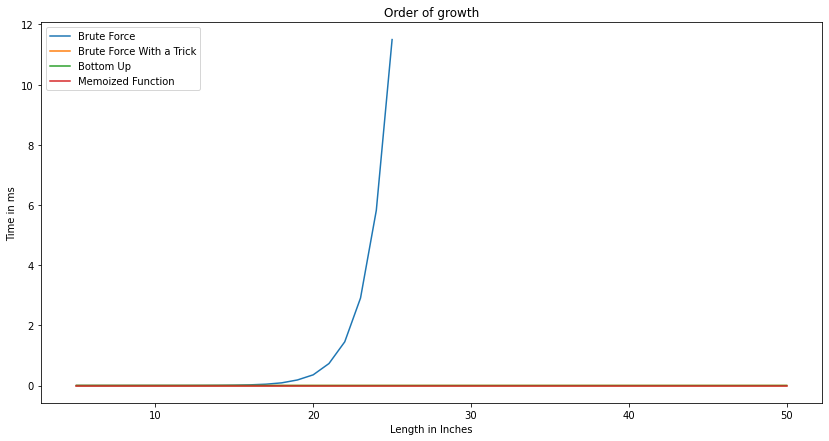

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (14,7)
x = list(range(5,51))
plt.plot(x[0:21],times_for_pure_brute_force_cutter, label="Brute Force")
plt.plot(x,times_for_brute_force_cutter_with_a_trick, label="Brute Force With a Trick")
plt.plot(x,times_for_bottom_up_cutter, label="Bottom Up")
plt.plot(x,times_for_memoized_cutter, label="Memoized Function")
plt.xlabel('Length in Inches')
plt.ylabel('Time in ms')
plt.title('Order of growth')
plt.legend(loc="upper left")

### We will plot only the 10 inches so we can see the distinction more clearly

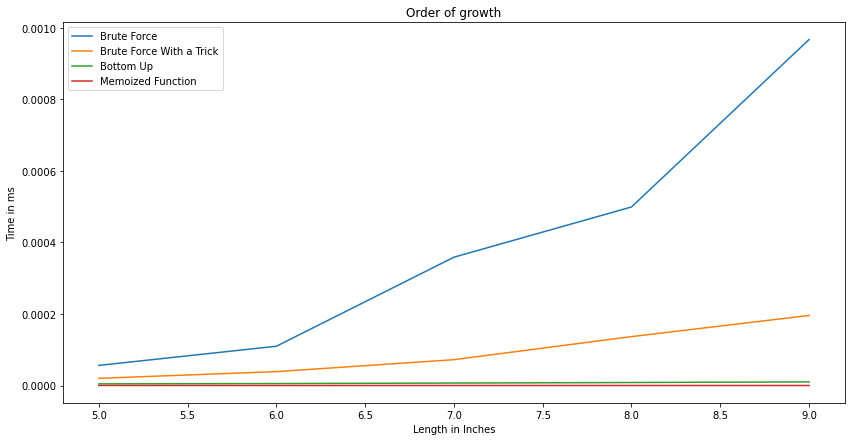

In [21]:
plt.plot(x[0:5],times_for_pure_brute_force_cutter[0:5], label="Brute Force")
plt.plot(x[0:5],times_for_brute_force_cutter_with_a_trick[0:5], label="Brute Force With a Trick")
plt.plot(x[0:5],times_for_bottom_up_cutter[0:5], label="Bottom Up")
plt.plot(x[0:5],times_for_memoized_cutter[0:5], label="Memoized Function")
plt.xlabel('Length in Inches')
plt.ylabel('Time in ms')
plt.title('Order of growth')
plt.legend(loc="upper left")

## Observations
### In the following graph, it is clear that the brute force with a trick algorithm has exponential order of growth until it reaches a value of length divisible by 10, then it resets. Which is exactly the trick.
### We also observe that the memory function outperforms the bottom up approach.

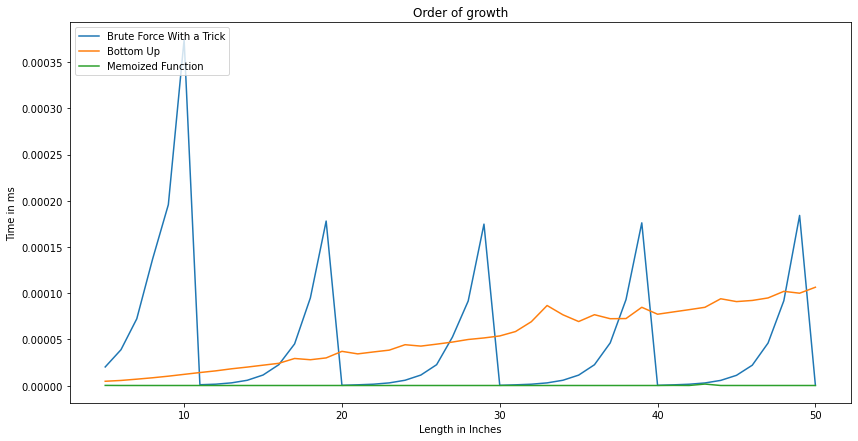

In [22]:
plt.plot(x,times_for_brute_force_cutter_with_a_trick, label="Brute Force With a Trick")
plt.plot(x,times_for_bottom_up_cutter, label="Bottom Up")
plt.plot(x,times_for_memoized_cutter, label="Memoized Function")
plt.xlabel('Length in Inches')
plt.ylabel('Time in ms')
plt.title('Order of growth')
plt.legend(loc="upper left")